# DATA MINING IRIS DATASET 

Kita menggenal terlebih dahulu apa itu Dataset Iris : Decision Tree
          Decision tree merupakan suatu struktur yang digunakan untuk membantu proses pengambilan keputusan. Disebut sebagai “tree” karena struktur ini menyerupai sebuah pohon lengkap dengan akar, batang, dan percabangannya. Dalam data science, struktur decision tree dapat membantu ambil keputusan efektif dan tetap memperhatikan kemungkinan hasil serta konsekuensinya. Decision tree ini termasuk dalam Supervised Machine Learning Model dimana data terus-menurus dibagi menurut parameter tertentu dan akhirnya keputusan dibuat. Sebuah pohon decision tree biasanya berisi 3 jenis node.
          Dataset Iris terdiri dari 150 sampel bunga iris, masing-masing dari salah satu dari tiga spesies: setosa, versicolor, dan virginica. Ada empat ciri: panjang sepal, lebar sepal, panjang kelopak, dan lebar kelopak. Tujuannya adalah membangun pohon keputusan untuk mengklasifikasikan spesies iris berdasarkan fitur-fitur tersebut.


# MENAMBAH DATA

## Siapkan Dataset

Yang disiapkan untuk melakukan dataset diperlukan 2 database yang berbeda yaitu menggunakan Mysql dan PostgreSql, data yang digunakan adalah Iris Dataset dari Kaggle, untuk mendownload bisa menuju link yang disedikan sebagai berikut: https://www.kaggle.com/datasets/saurabh00007/iriscsv

## Siapkan Database

Setelah menyiapkan dataset yang dilakukan sekarag adalah menyipkan database yang diperlukan yaitu
- Siapkan database Mysql Cloud dari aiven.io
- Siapkan database Postgre Cloud dari aiven.io

Setelah selesai menyiapkan database sekarang import data yang di download ke dalam mysql dan postgre dengan menggunakan software gui, yang di gunakan disini Mysql Workbench dan PgAdmin

Sekarang yang dilakukan memecah data dari Iris.csv menjadi dua bagian untuk melakukan suatu skenario, untuk membagi tabel nya sebagai berikut   

## Add Tabel 

### Tabel untuk ambil data 

Mysql : id, SepalLengthCm,SepalWidthCm, Species
Postgre : id, PetalLengthCm, PetalWidthCm, Species

Mysql :

    CREATE TABLE 'dataminingmysql'. 'Iris' (
    'Id' INT NOT NULL AUTO_INCREMENT
    'SepalLengthCm' FLOAT NULL,
    'SepalWidthCm' FLOAT NULL, 
    'Species' VARCHAR(45) NULL,
    PRIMARY KEY (('Id'));

Postgre :

    CREATE TABLE public."Iris"
    (
        "Id" integer NOT NULL,
        "PetalLengthCm" double preciesion,
        "PetalWitdthCm" double preciesion,
        "Species" character varying,
        PRIMARY KEY ("Id")
    ):

### Import Iris.csv

Tambahkan data dari csv pada kolom masing masing database

### Tabel hasil prepocessing

Kemudian siapkan tabel untuk menyimpan data hasil preprocessing, bisa di mysql atau postgre, disini saya membuat table baru pada database mysql dengan nama "IrisPrepocessing"

    CREATE TABLE 'dataminingmysql'. 'IrisPrepocessing' (
    'Id' INT NOT NULL AUTO_INCREMENT
    'Species' VARCHAR(45) NULL,
    'DataSepalLengthAsli' FLOAT NULL,
    'DataSepalLengthMean' FLOAT NULL,
    'DataSepalLengthKnn' FLOAT NULL,
    PRIMARY KEY (('Id'));

Kemudian masuk data asli ke SepalLengthCm dari Iris.csv

# SKENARIO

## Missing Value

Sebagi contoh ada 5 Missing Value dari Colum SepalLengthCm, dari 5 data tersebut ada 2 Missing Value lagi pada column Species 

- Kemudian hapus 5 data random dari Column SepalLengthCm (Ini terdapat pada tabel Mysql)

    UPDATE 'dataminingmysql' , 'Iris' SET 'SepalLengthCm' = NULL, 'Species' = NULL WHERE ('Id' = '10');
    UPDATE 'dataminingmysql' , 'Iris' SET 'SepalLengthCm' = NULL WHERE ('Id' = '18');
    UPDATE 'dataminingmysql' , 'Iris' SET 'SepalLengthCm' = NULL WHERE ('Id' = '56');
    UPDATE 'dataminingmysql' , 'Iris' SET 'SepalLengthCm' = NULL WHERE ('Id' = '100');
    UPDATE 'dataminingmysql' , 'Iris' SET 'SepalLengthCm' = NULL, 'Species' = NULL WHERE ('Id' = '129');


- Hapus 2 data dari Species Iris-Sentosa, 1 Data dari Iris-vensicolor dan 2 data lagi dari iris-virginica

- Hapus 2 data pada column Species dari 5 data yang sudah di pilih sebelumnya (karena Data Species ada pada 2 database, hapus data yang sama antara 2 database)

    UPDATE public."Iris" SET
    "Species" = NULL::character varying WHERE
    "Id" = 10;

    UPDATE public."Iris" SET
    "Species" = NULL::character varying WHERE
    "Id" = 129;

# MENGGUMPULKAN DATA

Pengambilan data dari cloud Aiven menggunakan integrasi Mysql dan PostgreSql dan gabungkan dengan datafame deepnote

## Data dari Mysql (Id, SepalLengthCM, SepalWidthCm, Species)

Setelah selesai selanjutnya simpan data dari mysql ke dalam Datafreme df_Mysql  

In [ ]:
df_1 = _deepnote_execute_sql('SELECT * FROM iris', 'SQL_E9FC09F4_31AD_4331_AFC8_9BA6C42C4BE0', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,Id,SepalLengthCm,SepalWidthCm,Species
0,1,5.1,3.5,Iris-setosa
1,2,4.9,3.0,Iris-setosa
2,3,4.7,3.2,Iris-setosa
3,4,4.6,3.1,Iris-setosa
4,5,5.0,3.6,Iris-setosa
...,...,...,...,...
145,146,6.7,3.0,Iris-virginica
146,147,6.3,2.5,Iris-virginica
147,148,6.5,3.0,Iris-virginica
148,149,6.2,3.4,Iris-virginica


### Data dari postgre (petalLength + petalWidth)

kemudian simpan data dari postgre kedalam Datafreme df_Postgre

In [ ]:
df_2 = _deepnote_execute_sql('SELECT "Id","PetalLengthCm", "PetalWidthCm"\n    FROM public."iris";', 'SQL_378F15F1_85DD_46C8_ABF1_08CEB13B19AC', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_2

,Id,PetalLengthCm,PetalWidthCm
0,1,1.4,0.2
1,2,1.4,0.2
2,3,1.3,0.2
3,4,1.5,0.2
4,5,1.4,0.2
...,...,...,...
145,146,5.2,2.3
146,147,5.0,1.9
147,148,5.2,2.0
148,149,5.4,2.3


## Gabungkan data dari Mysql dan PostgreSql kedalam Datafreme df_main

### Import library panda

In [ ]:
import pandas as pd

### Mulai menggabung data 

In [ ]:
df_main = pd.merge(df_1, df_2, on='Id',how='inner')

### Mengatur Agar Column pada df_main

dataframe ini bisa anda atur nama column sesuai yang anda suka

In [ ]:
df_main = df_main.rename(columns={'SepalLengthCm': 'SepalLengthCm',
                                'SepalWidthCm': 'SepalWidthCm',
                                'PetalLengthCm': 'PetalLengthCm',
                                'PetalWidthCm': 'PetalWidthCm',
                                'Species_x': 'Species'})

Atur Column

In [ ]:
df_main = df_main[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]

## Tampilkan data dari Main dataFrame 

In [ ]:
df_main.head(len(df_main))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Tampilkan data tabel IrisPrepocessing

untuk mengecek apakah sudah ada data asli pada tabel IrisPreProcessing

# DATA UNDERSTANDING

Mengidentifikasi data dengan dan melihat kualitas data berdasarkan jumlah data, banyak kelas/species, atau missing value, dan cara menemukan missing value

## Identifikasi Data

identifikasi banyak data  pada semua species, dan dibawah kita bisa lihat jumlah data yang ada pada setiap species

In [ ]:
class_counts = df_main['Species'].value_counts()
print(class_counts)

Species
Iris-versicolor    50
Iris-setosa        49
Iris-virginica     49
Name: count, dtype: int64


## Tabel Distribusi

Lihat semua tabel distribusi pada column data

- Lakukan import library yang dibutuhkan 

In [ ]:
import matplotlib.pyplot as plt 

- Lihat tabel frequency untuk setiap column data

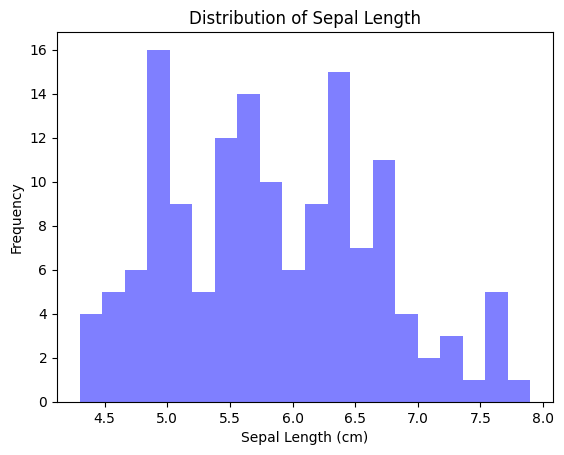

In [ ]:
plt.hist(df_main['SepalLengthCm'], bins=20, color='blue', alpha=0.5)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

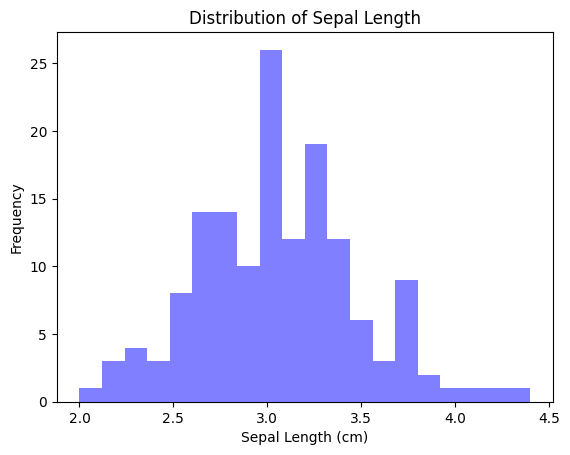

In [ ]:
plt.hist(df_main['SepalWidthCm'], bins=20, color='blue', alpha=0.5)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

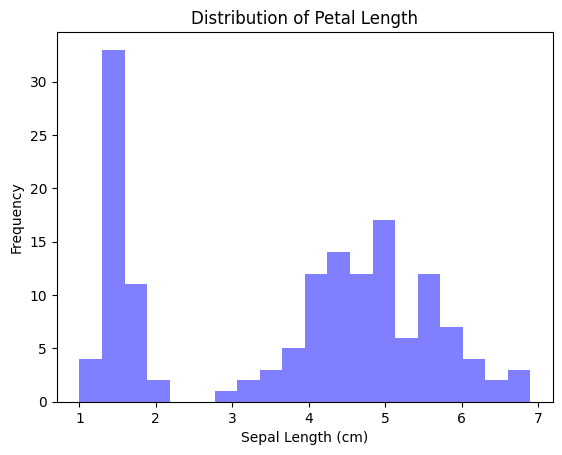

In [ ]:
plt.hist(df_main['PetalLengthCm'], bins=20, color='blue', alpha=0.5)
plt.title('Distribution of Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

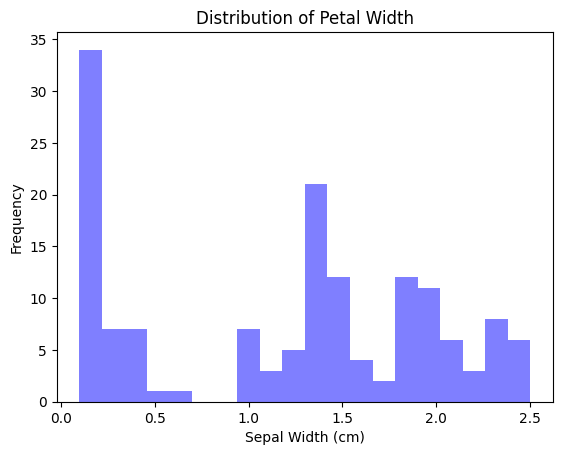

In [ ]:
plt.hist(df_main['PetalWidthCm'], bins=20, color='blue', alpha=0.5)
plt.title('Distribution of Petal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_220/2145076469.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_main['SepalLengthCm'], shade=True)


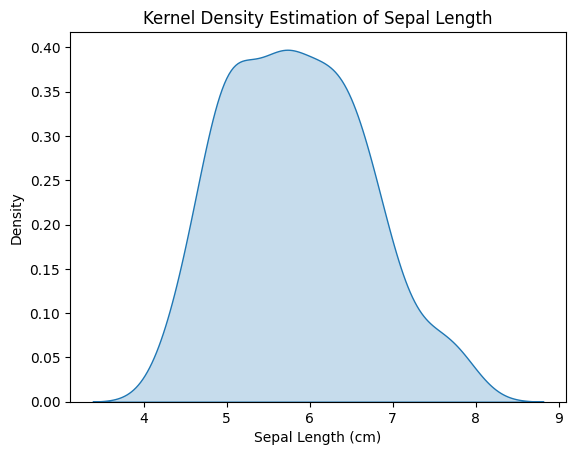

In [ ]:
import seaborn as sns 

sns.kdeplot(df_main['SepalLengthCm'], shade=True)
plt.title('Kernel Density Estimation of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.show()

## Visualisasi hubungan sepal dan petal pada iris

          Visualisasi Sepal dan Petal Features adalah tentang memvisualisasikan hubungan antara berbagai fitur bunga iris, baik sepat (kelopak) maupun petal (mahkota). Data yang umumnya digunakan untuk visualisasi ini berasal dari Iris dataset, yang mencakup empat fitur numerik: sepal length, sepal width, petal length, dan petal width

          Bunga iris adalah salah satu spesies bunga yang sering digunakan dalam studi klasifikasi dan pengenalan pola di bidang machine learning. Dataset bunga iris dikembangkan oleh ahli botanis Inggris Ronald Fisher pada tahun 1936. Dataset ini terdiri dari 150 sampel bunga iris yang dibagi menjadi 3 spesies yaitu: Iris Setosa
, Iris Versicolor
, Iris Virginica

- sekarang kita lihat visualisasi hubungan sepal dan petal 

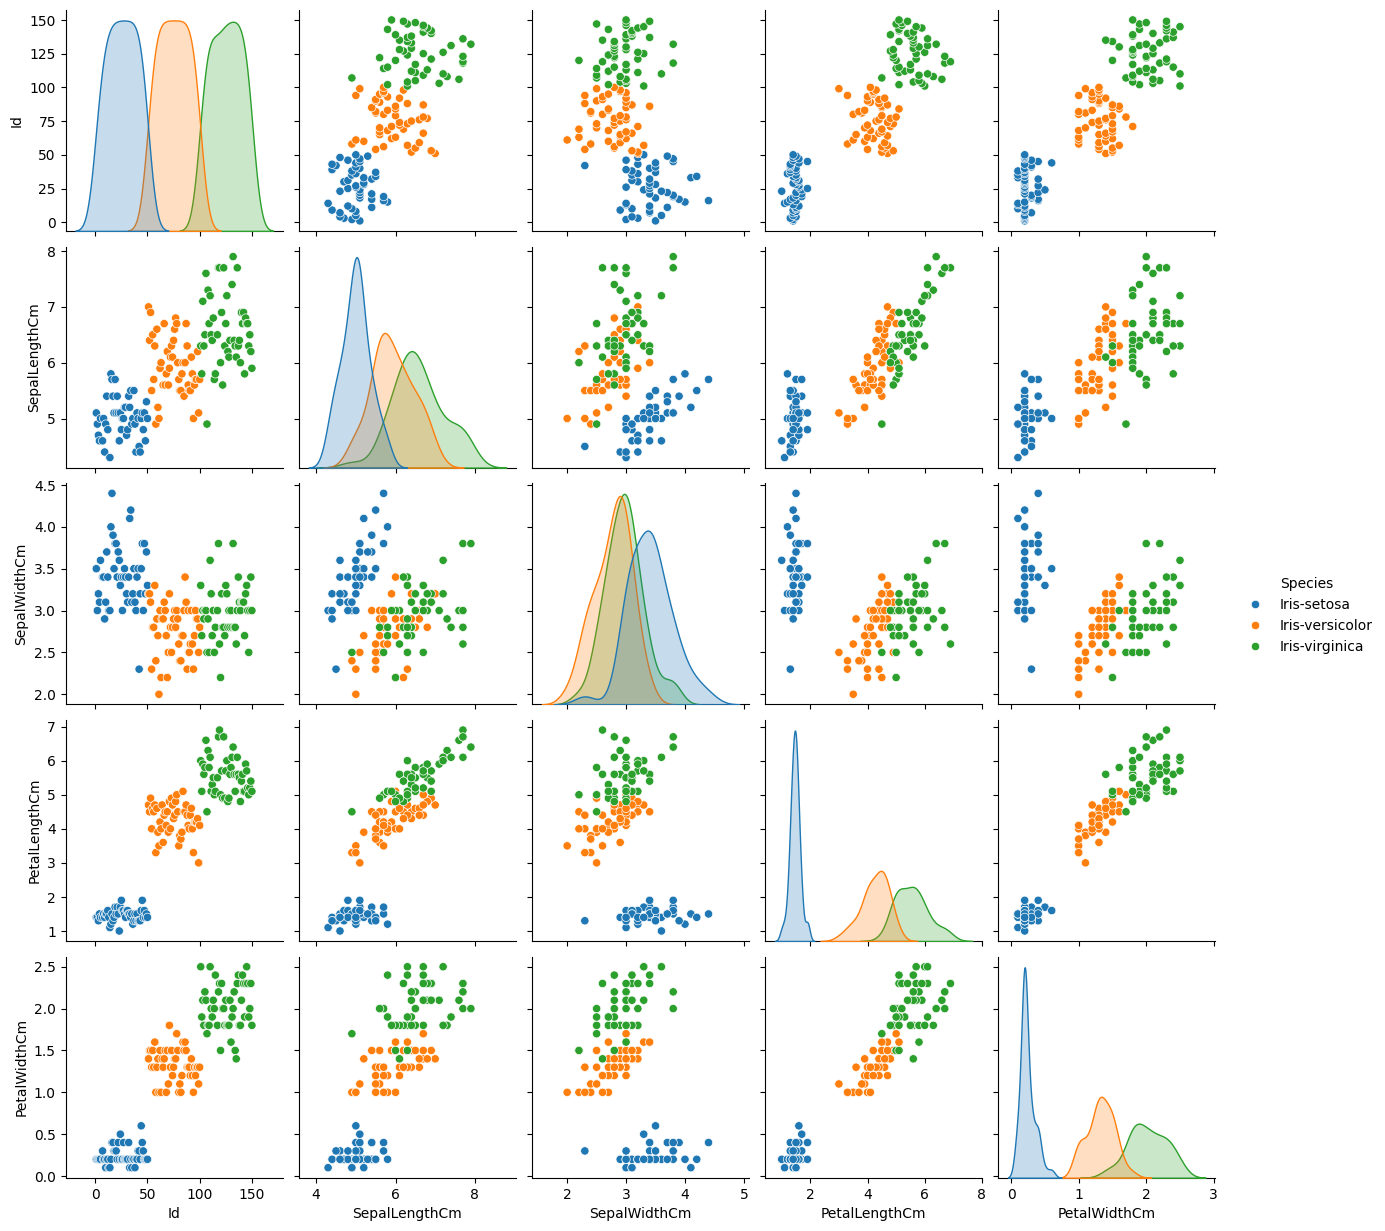

In [ ]:
sns.pairplot(df_main, hue='Species')
plt.show()

          Baik, untuk memvisualisasikan hubungan antara sepal dan petal pada bunga iris, saya akan menggunakan scatter plot. Scatter plot adalah jenis plot yang menggambarkan hubungan antara dua variabel dengan memetakan nilai-nilai tersebut dalam sistem koordinat kartesius.

          Analisis Distribusi Univariat: Diagonal utama dari pair plot menunjukkan distribusi univariat untuk setiap fitur. Perhatikan apakah ada perbedaan signifikan dalam distribusi fitur antara kelas-kelas bunga iris. Misalnya, apakah ada perbedaan dalam rentang atau kepadatan distribusi untuk fitur-fitur tertentu?

          Perhatikan Hubungan Antar Fitur: Perhatikan pola hubungan antara berbagai fitur. Misalnya, apakah ada hubungan linier antara sepal length dan sepal width? Atau, apakah ada pola hubungan yang kompleks antara petal length dan petal width

## Kualitas Data:

### Mencari Missing Value

- Mari lihat apa ada missing value pada data

In [ ]:
missing_value = df_main.isnull()
missing_value.head(len(missing_value))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


## Menampilkan missung values 

- Mari kita lihat colomn mana yang punya missing values

In [ ]:
kolom_dengan_missing_value = missing_value.any()

In [ ]:
print(kolom_dengan_missing_value)
print(kolom_dengan_missing_value[kolom_dengan_missing_value == True].index)

Id               False
SepalLengthCm     True
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species           True
dtype: bool
Index(['SepalLengthCm', 'Species'], dtype='object')


Tampilkan data pada column yang terindefikasi dengan missing value 

In [ ]:
data_missing = df_main[df_main[kolom_dengan_missing_value[kolom_dengan_missing_value].index].isna().any(axis=1)]

In [ ]:
data_missing.head(len(data_missing))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5,6,NaN,3.9,1.7,0.4,None
12,13,NaN,3.0,1.4,0.1,Iris-setosa
63,64,NaN,2.9,4.7,1.4,Iris-versicolor
115,116,NaN,3.2,5.3,2.3,None
129,130,NaN,3.0,5.8,1.6,Iris-virginica


# PREPOCESSING DATA

## Cleaning data

In [ ]:
df_cleaned = df_main.dropna(subset=['Species'])
df_cleaned.head(len(df_cleaned))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df_cleaned_knn = df_main.dropna(subset=['Species'])
df_cleaned_knn.head(len(df_cleaned))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Imputasi Missing Value

### Dengan rata-rata

<img src="Screenshot 2024-03-21 031546.png" width="" align="" />

In [ ]:
rata_rata_per_species = df_cleaned.groupby('Species')['SepalLengthCm'].mean().round(1)
print(rata_rata_per_species)

Species
Iris-setosa        5.0
Iris-versicolor    5.9
Iris-virginica     6.6
Name: SepalLengthCm, dtype: float64


In [ ]:
for species, rata_rata in rata_rata_per_species.items():
    df_cleaned.loc[df_cleaned['Species'] == species, 'SepalLengthCm'] = df_cleaned.loc[df_cleaned['Species'] == species].fillna(rata_rata)

In [ ]:
df_cleaned.head(len(df_cleaned))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Dengan KNN

          K-Nearest Neighbors (K-NN) adalah algoritma supervised learning yang digunakan untuk klasifikasi dan regresi. Algoritma ini bekerja dengan mencari pola-pola dari data train untuk mengklasifikasikan data baru.

          Konsep utama dari K-NN adalah mencari k tetangga terdekat dari data baru berdasarkan fitur-fitur yang dimiliki, kemudian mengklasifikasikan data baru tersebut ke dalam kelas yang paling banyak diwakili oleh k tetangganya.

<img src="0_34SajbTO2C5Lvigs.png" width="50%" align="" />

Apakah kamu tau cara kerja K-Nearest Neighbors, yuk kita cari tau
Cara kerja K-NN dapat dijelaskan berdasarkan algoritma di bawah ini:

Langkah-1: Pilih nomor K tetangga
Langkah-2: Hitung jarak Euclidean dari K jumlah tetangga
Langkah-3: Ambil K tetangga terdekat sesuai jarak Euclidean yang dihitung.
Langkah-4: Di antara k tetangga ini, hitung jumlah titik data di setiap kategori.
Langkah-5: Tetapkan titik data baru ke kategori yang jumlah tetangganya maksimum.
Langkah-6: Model kita sudah siap

- Pertama kita pilih jumlah tetangganya, misalkan 5

- Menghitung Jarak

Jarak Euclidean: Jarak Euclidean mengukur jarak garis lurus antara dua titik dalam ruang multidimensi. Untuk dua titik P = (p1, p2, ..., pn) dan Q = (q1, q2, ..., qn) dengan n dimensi, jarak Euclidean dihitung dengan rumus:

Jarak Manhattan: Jarak Manhattan, juga disebut jarak city block, mengukur jarak antara dua titik dengan menjumlahkan selisih absolut dari nilai-nilai koordinat mereka. Untuk dua titik P = (p1, p2, ..., pn) dan Q = (q1, q2, ..., qn) dengan n dimensi, jarak Manhattan dihitung dengan rumus:

lanjutnya kita menghitung jarak euclidean kita anggap sebagai tetangga terdekat ntar titik data. Jarak Euclidean adalah jarak antara dua titik, yang telah kita pelajari dalam geometri, Ini dapat dihitung sebagai

<img src="Screenshot 2024-03-21 032938.png" width="50%" align="" />

Dengan menghitung jarak Euclidean kita mendapatkan tetangga terdekat, yaitu tiga tetangga terdekat pada kategori A dan dua tetangga terdekat pada kategori B. Perhatikan gambar di bawah ini

<img src="Screenshot 2024-03-21 033222.png" width="50%" align="" />

- KNN dengan library Sklearn pada data Iris

In [ ]:
from sklearn.impute import KNNImputer

- Inisialisasi neighbours untuk knn

In [ ]:
imputer = KNNImputer(n_neighbors=5)

- Ambil data dari df_cleaned2 dan buat salinan untuk hasil knn imputer

In [ ]:
df_imputed = df_cleaned_knn.copy()

- Mengimput nilai missing value pada df_cleaned_knn dengan KNN Imputer 

In [ ]:
df_imputed[['SepalLengthCm']] = imputer.fit_transform(df_cleaned_knn[['SepalLengthCm']])

Buat lebih clean, 1 angka belakang koma

In [ ]:
df_imputed[['SepalLengthCm']] = df_imputed[['SepalLengthCm']].round(1)

In [ ]:
df_imputed.head(len(df_imputed))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Input data hasil prepocessing ke tabel

- input library dan buat koneksi

In [ ]:
from sqlalchemy import create_engine

#Membuat strkoneksi tanpa menggunakan varibel

#Membuat koneksi ke database 
engine = create_engine(connection_str)

- setelah hasil imput missing dengan mean dan knn selesai, input dalam tabel irisPreprocessing pada mysql

In [ ]:
# for index, row in df_cleaned.iterrows():
#     update_query = f"""
#         UPDATE IrisPreprocessing
#         SET SepalLengthMean = {row['SepalLengthCm']}
#         WHERE Id = {row['Id']}
#     """
#     with engine.connect() as connection:
#         connection.execute(update_query)

In [ ]:
# for index, row in df_imputed.iterrows():
#     update_query = f"""
#         UPDATE IrisPreprocessing
#         SET SepalLengthKnn = {row['SepalLengthCm']}
#         WHERE Id = {row['Id']}
#     """
#     with engine.connect() as connection:
#         connection.execute(update_query)

- Sekarang tampilkan data pada irisPreprocessing apakah sudah terinput

In [ ]:
_deepnote_execute_sql('SELECT * FROM IrisPreprocessing', 'SQL_E9FC09F4_31AD_4331_AFC8_9BA6C42C4BE0', audit_sql_comment='', sql_cache_mode='cache_disabled')

,Id,Species,SepalLengthAsli,SepalLengthMean,SepalLengthKnn
0,1,Iris-setosa,5.1,5.1,5.1
1,2,Iris-setosa,4.9,4.9,4.9
2,3,Iris-setosa,4.7,4.7,4.7
3,4,Iris-setosa,4.6,4.6,4.6
4,5,Iris-setosa,5.0,5.0,5.0
...,...,...,...,...,...
145,146,Iris-virginica,6.7,6.7,6.7
146,147,Iris-virginica,6.3,6.3,6.3
147,148,Iris-virginica,6.5,6.5,6.5
148,149,Iris-virginica,6.2,6.2,6.2


In [ ]:
df_main.head(len(df_main))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
missing_value = df_main.isnull()
missing_value.head(len(missing_value))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [ ]:
print(kolom_dengan_missing_value[kolom_dengan_missing_value == True].index)

Index(['SepalLengthCm', 'Species'], dtype='object')


In [ ]:
df_cleaned = df_main.dropna(subset=['Species'])

- Pada df_cleaned apakah sudah tidak ada missing value 

In [ ]:
df_cleaned.head(len(df_cleaned))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df_cleaned2 = df_main.dropna(subset=['Species'])

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

In [ ]:
df_imputed = df_cleaned2.copy()

In [ ]:
df_imputed[['SepalLengthCm']] = imputer.fit_transform(df_cleaned2[['SepalLengthCm']])

Setelah hasil prepocessing input missing vulue dengan mean dan KKN selesai, input kedalam tabel irisPreprocessing pada mysql

## Dekteksi Outlier (local outlier factor)

### Konsep  Local Outlier Factor 

Local Outlier Factor (LOF) adalah sebuah metode yang digunakan untuk mendeteksi outlier (data pencilan) dalam data berbentuk numerik.. Ini menganggap sampel yang memiliki kepadatan jauh lebih rendah daripada sampel tetangganya sebagai outlier. Konsep utama dari LOF adalah dengan membandingkan kepadatan lokal dari sebuah data terhadap kepadatan lokal data-data di sekitarnya. Kelebihan utama dari LOF adalah kemampuannya untuk mendeteksi outlier bahkan dalam data yang memiliki distribusi yang kompleks dan tidak teratur. Selain itu, LOF juga dapat mendeteksi outlier dalam data dengan dimensi yang tinggi.

### Menghitung manual Local Oulier Factor

data contoh data dengan tipe numerik 3 fitur jumlah data 10 k = 3, p = 2 (euclidian distancs

<img src="file_input_uploads/Screenshot 2024-03-20 212249.png" width="" align="" />

- step 1 hitung jarak antar setiap data dengan euclidean

<img src="Screenshot 2024-03-20 223631.png" width="75%" align="" />

- step 2 menentukan k-Neareast Neighbors (k=3)

<img src="Screenshot 2024-03-20 231417.png" width="75%" align="" />

- step 3 menghitung Local Reachability Density (LRD)

Hitung RD menggunkan rumus 

<img src="Screenshot 2024-03-20 231704.png" width="50%" align="" />

Hitung LRD dengan rumus

<img src="Screenshot 2024-03-20 231916.png" width="50%" align="" />

Misal untuk yang RD dan LRD A:

    RD(F) = max(d(F, A), k-distance(F))
        d(F, A) = √5 ≈ 2.24
        k-distance(F) = √11 ≈ 3.32
        RD(F) = max(2.24, 3.32) = 3.32
    RD(B) = max(d(B, A), k-distance(B))
        d(B, A) = √10 ≈ 3.16	
    k-distance(B) = √11 ≈ 3.32
        RD(B) = max(3.16, 3.32) = 3.32
    RD(I) = max(d(I, A), k-distance(I))
        d(I, A) = √11 ≈ 3.32	
    k-distance(B) = √11 ≈ 3.32
        RD(I) = max(3.32,  3.32) = 3.32
    LRD(A) = 1 / ((1/3.32) + (1/3.32) + (1/3.32))
    LRD(A) ≈ 0.90




Maka dengan perhitungan yang sama ditemukan LRD untuk setiap titik

<img src="Screenshot 2024-03-21 002040.png" width="" align="" />

- Maka setelah LRD ditemukan saatnya menghitung Local Outlier Factor dengan rumus

<img src="Screenshot 2024-03-21 002226.png" width="" align="" />

- Berikut hasil LOF untuk setiap titik

    LOF(A) ≈ 1.02
    LOF(B) ≈ 1.02
    LOF(C) ≈ 0.99
    LOF(D) ≈ 1.08
    LOF(E) ≈ 1.10
    LOF(F) ≈ 0.82
    LOF(G) ≈ 0.93
    LOF(H) ≈ 0.97
    LOF(I) ≈ 0.82
    LOF(J) ≈ 0.95


- Sekarang ditemukan bahwa top 1 outlier yang ada pada titik E (1.10)

### Menghitung menggunakan python (Scikit Learn)

### Implementasi Local Outlier Factor pada data Iris

- Menyiapkan data dummy kemudian import ke dataframe

<img src="Screenshot 2024-03-21 012021.png" width="actual" align="" />

In [ ]:
#Data Tabel
data = {
    'x': [6.2, 5.3, 2.9, 5.4, 3.7, 5.2, 3.4, 3.2, 4.2, 8.1, 5.9, 9.5, 7.4, 1.7, 4.0],
    'y': [1.1, 9.1, 3.8, 0.8, 1.8, 100, 4.0, 4.8, 3.2, 3.0, 3.3, 8.3, 2.9, 2.5, 6.3],
    'z': [1.9, 8.4, 7.0, 2.7, 3.4, 6.9, 8.1, 8.7, 5.9, 5.5, 0.1, 7.4, 3.9, 7.0, 4.0]
}

#Daftar nama titik
titik = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

#Membuat DataFrame menggunakan Pandas
df_outlier = pd.DataFrame (data, index=titik)

In [ ]:
_deepnote_execute_sql('SELECT * FROM df_outlier', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')

,x,y,z
0,6.2,1.1,1.9
1,5.3,9.1,8.4
2,2.9,3.8,7.0
3,5.4,0.8,2.7
4,3.7,1.8,3.4
5,5.2,100.0,6.9
6,3.4,4.0,8.1
7,3.2,4.8,8.7
8,4.2,3.2,5.9
9,8.1,3.0,5.5


- prediksi outlier dengan sklearn Library

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import plotly.graph_objects as go

lof = LocalOutlierFactor(n_neighbors=3, p=2)
outlier_labels = lof.fit_predict(df_outlier)

# Menambahkan label outlier ke DataFrame
df_outlier['Outlier'] = outlier_labels

# Pisahkan data menjadi outlier dan non-outlier
outliers = df_outlier[df_outlier['Outlier'] == -1]
non_outliers = df_outlier[df_outlier['Outlier'] == 1]

# Membuat plot menggunakan Plotly
fig = go.Figure()

# Plot non-outliers
fig.add_trace(go.Scatter3d(
    x=non_outliers['x'],
    y=non_outliers['y'],
    z=non_outliers['z'],
    mode='markers',
    marker=dict(color='blue', size=10),
    name='Non-Outlier'
))

# Plot outliers
fig.add_trace(go.Scatter3d(
    x=outliers['x'],
    y=outliers['y'],
    z=outliers['z'],
    mode='markers',
    marker=dict(color='red', size=10, symbol='x'),
    name='Outlier'
))

# Menambahkan label titik
for i, txt in enumerate(titik):
    fig.add_annotation(
        x=df_outlier.iloc[i]['x'],
        y=df_outlier.iloc[i]['y'],
        text=titik[i],
        showarrow=False
    )

# Mengatur layout
fig.update_layout(
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z',
        aspectmode='cube'
    ),
    title='Data Visualization with Outliers'
)

# Menampilkan plot
fig.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=90bce62a-1d9b-4de6-972a-5eead95ff5de' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>